In [104]:
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt
plt.style.use("ggplot")

In [105]:
data = pd.read_csv("xclara.csv")
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [106]:
x = data["V1"].values
y = data["V2"].values
arr = np.array(list(zip(x,y)))

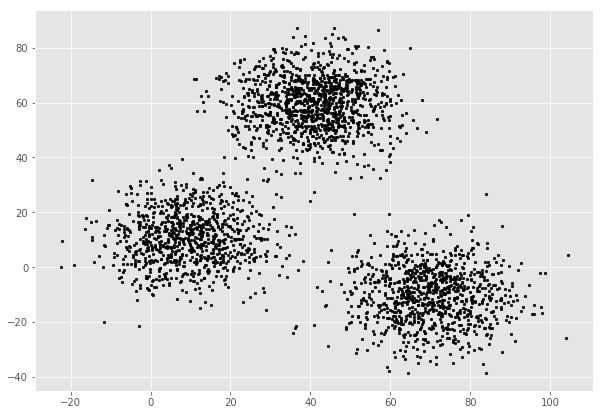

In [107]:
plt.figure(figsize=(10,7))
plt.scatter(x,y,s=7,c="black")

In [108]:
k = 3
np.random.seed(1)
centroids_x = np.random.randint(0,max(x)-20,size=k)
centroids_y = np.random.randint(0,max(x-20),size=k)
centroids = np.array(list(zip(centroids_x,centroids_y)))

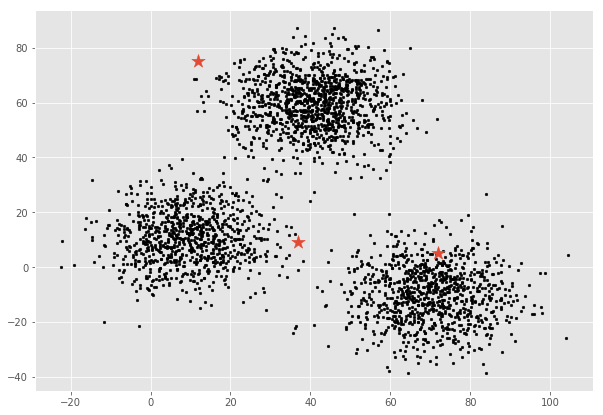

In [109]:
plt.figure(figsize=(10,7))
plt.scatter(x,y,s=7,c="black")
plt.scatter(centroids_x,centroids_y,marker="*",s=200)

In [110]:
def dist(x,y,ax=1):
    return np.linalg.norm(x-y,axis=ax)

In [111]:
centroids_old = np.zeros(centroids.shape)
clusters = np.zeros(len(arr))

error = dist(centroids,centroids_old,None)

while error != 0:
    
    for i in range(len(arr)):
        distances = dist(arr[i],centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    centroids_old = deepcopy(centroids)
        
    for i in range(k):
            points = [arr[j] for j in range(len(arr)) if clusters[j] == i]
            centroids[i] = np.mean(points, axis=0)
            
    error = dist(centroids,centroids_old,None)
    


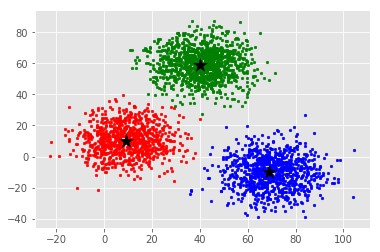

In [115]:
colors = ["r","g","b"]

fig,sub = plt.subplots()



for i in range(k):
    point = np.array([arr[j] for j in range(len(arr)) if clusters[j] == i])
    plt.scatter(point[:, 0], point[:, 1], s=7, c=colors[i])
    
plt.scatter(centroids[:, 0], centroids[:, 1],s=200,marker="*",c="black") 

    